<a href="https://colab.research.google.com/github/MrSaral/IEEE_Fraud_Detection/blob/master/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [0]:
# TODO: code and runtime results
from google.colab import drive 
drive.mount('/content/gdrive')
#I uploaded the CSV files on my google drive since im using colab. It is easy to import drive
import pandas as pd 
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
train_trans=pd.read_csv('gdrive/My Drive/Colab Notebooks/DSF Homework2/train_transaction.csv', usecols=['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card4', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain'])
train_iden=pd.read_csv('gdrive/My Drive/Colab Notebooks/DSF Homework2/train_identity.csv', usecols=['TransactionID', 'DeviceType', 'DeviceInfo'])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#This cell is for checking status of whats inside the dataframes
f

In [0]:
#I am planning to create a master table with all the fields required
#I have read all necessary columns, now exploration begins
#final table merged f
f=pd.merge(train_trans,train_iden,on='TransactionID',how='outer')

In [0]:
#We need to convert the seconds of Transaction DT into actual date
ref_date=dt.datetime.strptime('2019-08-18','%Y-%m-%d')

print(ref_date)
#We need a reference date to begin our analysis, the beauty of time in seconds is, it works with any reference date.
#So i chose my birthday as reference date
f['TransactionDateTime'] = f['TransactionDT'].apply(lambda y:(ref_date+dt.timedelta(seconds=y)))
f['TransactionHour']=f['TransactionDateTime'].dt.hour
f['TransactionDay']=f['TransactionDateTime'].dt.day_name()

2019-08-18 00:00:00


In [0]:
fraud=f[f['isFraud']==1]
fraud
#fraud has the merged table with all fraud transactions

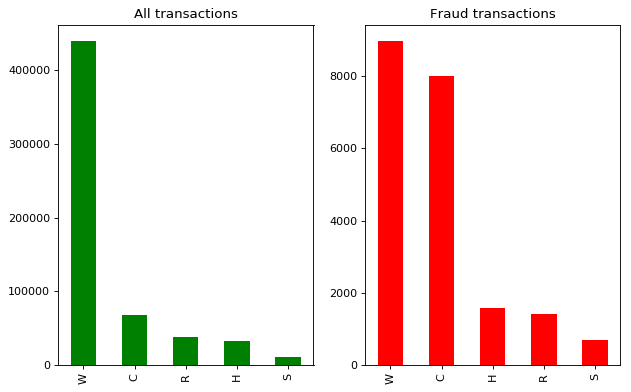

In [0]:
#Product CD
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
f['ProductCD'].value_counts().plot(kind='bar', color='g', title='All transactions') 
plt.subplot(1, 2, 2)  # Fraud
fraud['ProductCD'].value_counts().plot(kind='bar', color='r', title='Fraud transactions') 
plt.tight_layout()
plt.show()

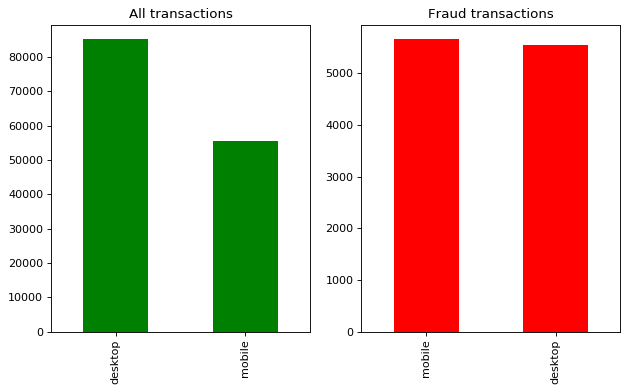

In [0]:
#DeviceType
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
f['DeviceType'].value_counts().plot(kind='bar', color='g', title='All transactions') 
plt.subplot(1, 2, 2)  # Fraud
fraud['DeviceType'].value_counts().plot(kind='bar', color='r', title='Fraud transactions') 
plt.tight_layout()
plt.show()

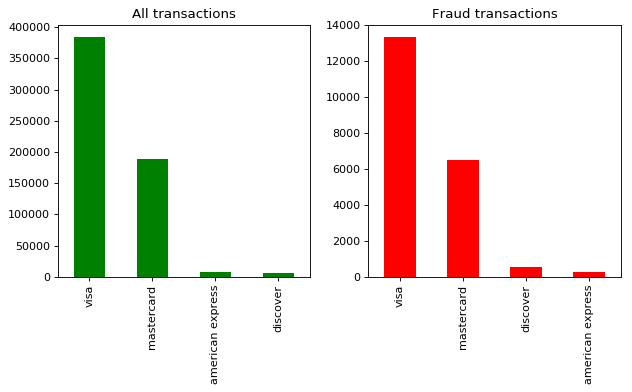

In [0]:
#card4
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
f['card4'].value_counts().plot(kind='bar', color='g', title='All transactions') 
plt.subplot(1, 2, 2)  # Fraud
fraud['card4'].value_counts().plot(kind='bar', color='r', title='Fraud transactions') 
plt.tight_layout()
plt.show()

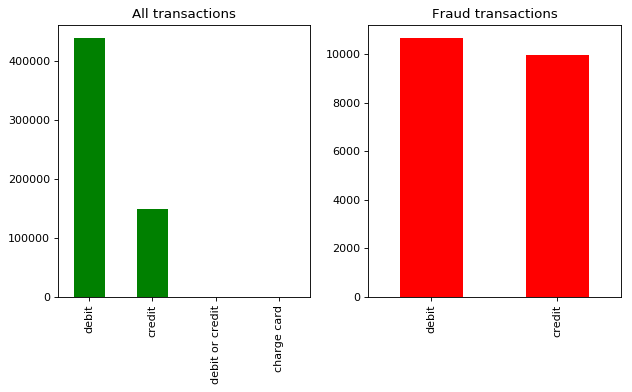

In [0]:
#card6
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
f['card6'].value_counts().plot(kind='bar', color='g', title='All transactions') 
plt.subplot(1, 2, 2)  # Fraud
fraud['card6'].value_counts().plot(kind='bar', color='r', title='Fraud transactions') 
plt.tight_layout()
plt.show()

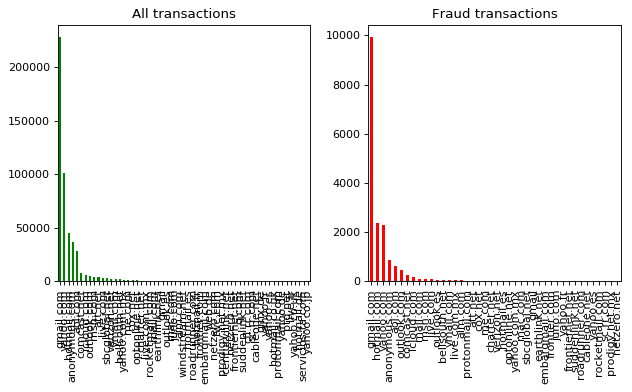

In [0]:
#P_emaildomain
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
f['P_emaildomain'].value_counts().plot(kind='bar', color='g', title='All transactions') 
plt.subplot(1, 2, 2)  # Fraud
fraud['P_emaildomain'].value_counts().plot(kind='bar', color='r', title='Fraud transactions') 
plt.tight_layout()
plt.show()
# Plotting all emails is not very useful

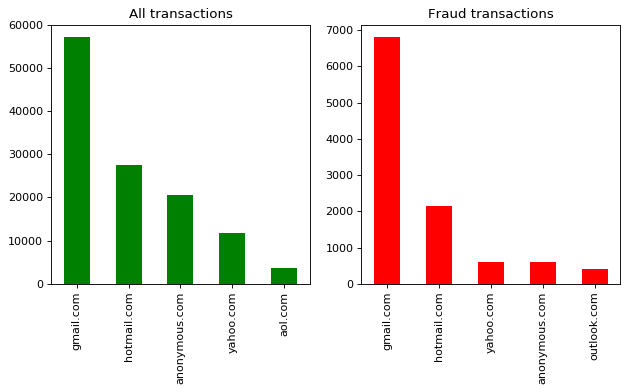

In [0]:
#R_emaildomain
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
f['R_emaildomain'].value_counts().head(5).plot(kind='bar', color='g', title='All transactions') 
plt.subplot(1, 2, 2)  # Fraud
fraud['R_emaildomain'].value_counts().head(5).plot(kind='bar', color='r', title='Fraud transactions') 
plt.tight_layout()
plt.show()
#Top 5 emails

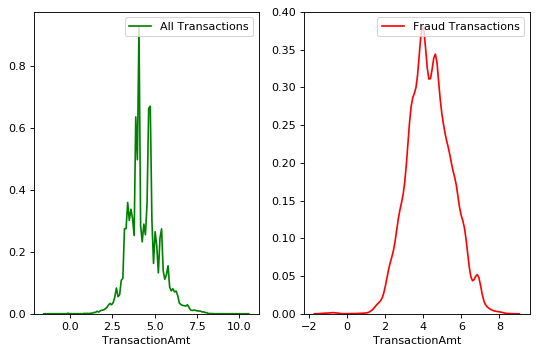

In [0]:
#TransactionAmt
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
sns.distplot(np.log(f['TransactionAmt']), hist=False, label="All Transactions",color='g')
plt.legend()
plt.subplot(1, 2, 2)  # Fraud
sns.distplot(np.log(fraud['TransactionAmt']), hist=False, label="Fraud Transactions",color='r')
plt.legend()
plt.show()

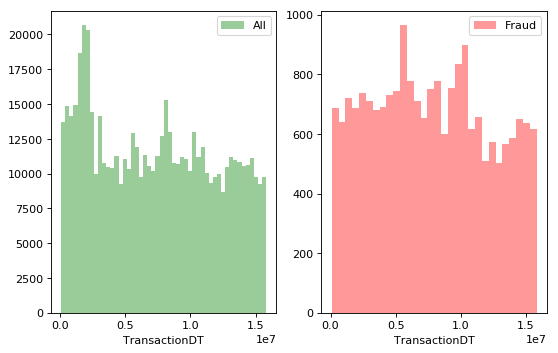

In [0]:
#TransactionDT
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
sns.distplot(np.power(f['TransactionDT'],1), hist=True, label='All',kde=False, color='g')

plt.legend()
plt.subplot(1, 2, 2)  # Fraud
sns.distplot(np.power(fraud['TransactionDT'],1), hist=True, label='Fraud', kde=False, color='r')
#plt.ylim(top=20000)
plt.legend()
plt.show()

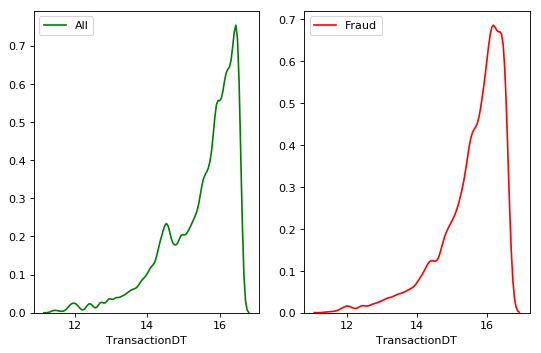

In [0]:
#TransactionDT
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
sns.distplot(np.log(f['TransactionDT']), hist=False, label='All',color='g')
plt.legend()
plt.subplot(1, 2, 2)  # Fraud
sns.distplot(np.log(fraud['TransactionDT']), hist=False, label='Fraud',color='r')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


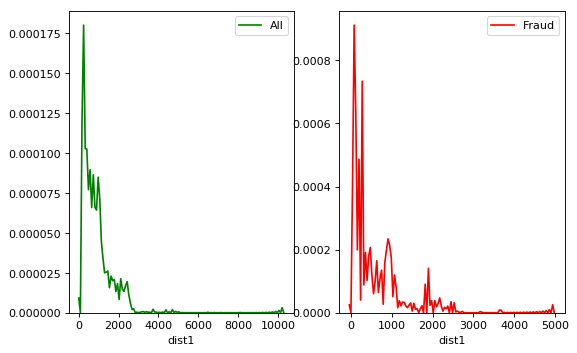

In [0]:
#dist1
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
sns.distplot(f['dist1'], hist=False, label='All',color='g')
plt.legend()
plt.subplot(1, 2, 2)  # Fraud
sns.distplot(fraud['dist1'], hist=False, label='Fraud',color='r')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


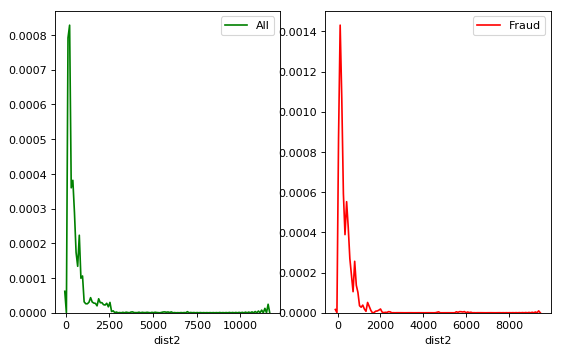

In [0]:
#dist2
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
sns.distplot(f['dist2'], hist=False, label='All',color='g')
plt.legend()
plt.subplot(1, 2, 2)  # Fraud
sns.distplot(fraud['dist2'], hist=False, label='Fraud',color='r')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


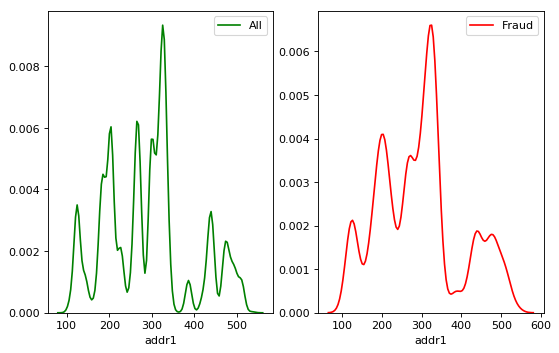

In [0]:
#addr1
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
sns.distplot(f['addr1'], hist=False, label='All',color='g')
plt.legend()
plt.subplot(1, 2, 2)  # Fraud
sns.distplot(fraud['addr1'], hist=False, label='Fraud',color='r')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


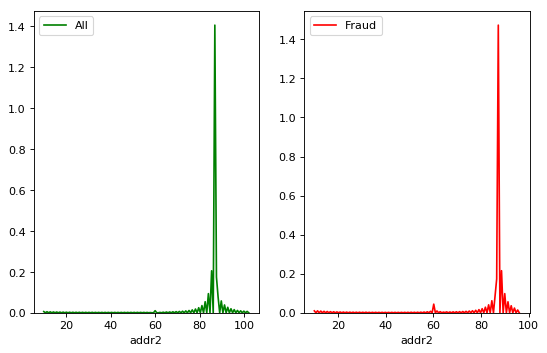

In [0]:
#addr2
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
sns.distplot(f['addr2'], hist=False, label='All',color='g')
plt.legend()
plt.subplot(1, 2, 2)  # Fraud
sns.distplot(fraud['addr2'], hist=False, label='Fraud',color='r')
plt.legend()
plt.show()

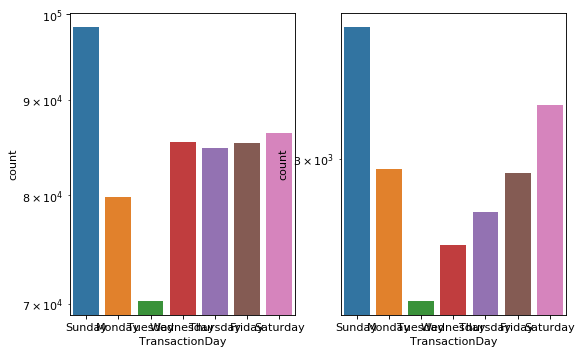

In [0]:
#TransactionDay
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
p=sns.countplot(data=f,x='TransactionDay')
plt.xticks(np.arange(7), ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday'))
p.set_yscale("log")
plt.subplot(1, 2, 2)  # Fraud
p=sns.countplot(data=fraud,x='TransactionDay')
plt.xticks(np.arange(7), ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday'))
p.set_yscale("log")
plt.show()

# Taking log to reove outliers.

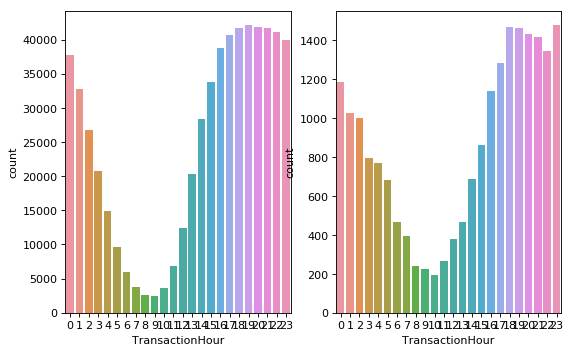

In [0]:
#TransactionHour
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(1, 2, 1)  # All transactions
p=sns.countplot(data=f,x='TransactionHour')
#p.set_yscale("log")
plt.subplot(1, 2, 2)  # Fraud
p=sns.countplot(data=fraud,x='TransactionHour')
#p.set_yscale("log")
plt.show()

# Taking log to reove outliers.

I took two array, one consisting of all transactions and one of the fraud transactions.Plotted them against one another.

Even After using various Data regularising techniques, card4, addr1, addr2, dist1, and dist2, there wasn't much difference to offer.

On case by case basis, I used data normalising techniques, like log, sqrt, cube root, this was to eliminated outliers.

In ProductCD, we observe the ratio of W:C is less for frauds, suggesting that C has more frauds.

For emails, first I plot all emails, but it was very less informative, so i took top 5 emails for my analysis.

By comparing ratios, we observe more frauds in credit cards as compared to debit card. Maybe credit cards don't require ATM pins, might be the reason for more frauds.

For hour and day of the week, I took a reference date of 2019-08-18. We conclude transactions are similar on three days while frauds keep increasing. 

Frauds are more in mobile transactions as compared to Desktop.

In TransactionAmt, the frauds have a more smooth gaussian distribution while non frauds are more noisey.

Thus, these are the observations I made.

## Part 2 - Transaction Frequency

87.0


Text(0.5, 1.0, 'Addr2=87.0')

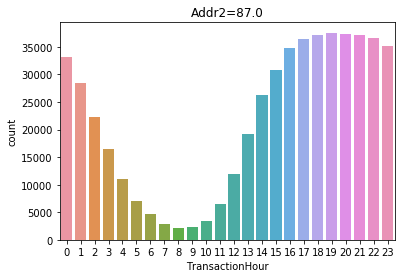

In [0]:
# TODO: code to generate the frequency graph
#Question 2
#First part, we need to find the most frequent addr2
#let fcc be frequent country code
fcc=f['addr2'].value_counts().head(1).index[0]
print (fcc)
fcca=f[f['addr2']==fcc]
#TransactionHour
sns.countplot(data=fcca,x='TransactionHour').set_title('Addr2='+str(fcc))


We observe that, based on our reference of 2019-08-18:0:0:0, we see the waking hours as approx 12.

We know usually transactions are high during 9-5 office hours, so the office hours for 87.0 can be 15 to 23.

Sleeping can be concluded as decline in number of transactions, around 2 to 14 in our reference time.


## Part 3 - Product Code

In [0]:
# TODO: code to analyze prices for different product codes
f['ProductCD'].value_counts()

#Question 3
def stats(s):
  g=f[f['ProductCD']==s]
  print ('For ProductCD='+s)
  print ('Mean = '+str(g['TransactionAmt'].mean()))
  print ('Median = '+str(g['TransactionAmt'].median()))
  print ('Max = '+str(g['TransactionAmt'].max()))
  print ('Min = '+str(g['TransactionAmt'].min()))

  return
  

In [0]:
stats('W')
stats('C')
stats('R')
stats('H')
stats('S')

For ProductCD=W
Mean = 153.15855385223293
Median = 78.5
Max = 31937.391
Min = 1.0
For ProductCD=C
Mean = 42.872353113733446
Median = 31.191
Max = 712.8960000000001
Min = 0.251
For ProductCD=R
Mean = 168.30618849306347
Median = 125.0
Max = 1800.0
Min = 25.0
For ProductCD=H
Mean = 73.17005813953489
Median = 50.0
Max = 500.0
Min = 15.0
For ProductCD=S
Mean = 60.269487444100434
Median = 35.0
Max = 1550.0
Min = 5.0


As we can see, R has a greater median and mean as well. 


Max of R is not too big as compared W, thus mean is not much affected by outliers.
Thus, R is most expensive

For cheap products, C is cheapest.
Similar arguments can be applied to prove C is the cheapest.

## Part 4 - Correlation Coefficient

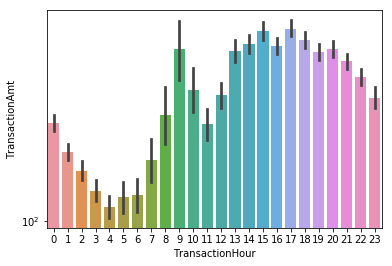

In [0]:
# TODO: code to calculate correlation coefficient
#Question 4
g=f
g.dropna(subset=['TransactionHour', 'TransactionAmt'])
p=sns.barplot(data=g,x='TransactionHour',y='TransactionAmt')
p.set_yscale("log")

In [0]:
from scipy import stats
stats.pearsonr(g.groupby('TransactionHour').TransactionAmt.sum(),g['TransactionHour'].unique())

(0.6421174943084446, 0.000717472158223154)

Since there are multiple entries for TransactionAmt for the same hour, finding correlation would not make sense just yet.

I grouped the TransactionAmts based on their Hours. This will yield into addition of all transactionamts for that hour, and yield 24 fields.

I used Pearson's coefficient to calculate correlation, it came out to be **0.64**

My choice of Pearson's correlation is because it not only tells if there is correlation but it tells positive and negative.


## Part 5 - Interesting Plot

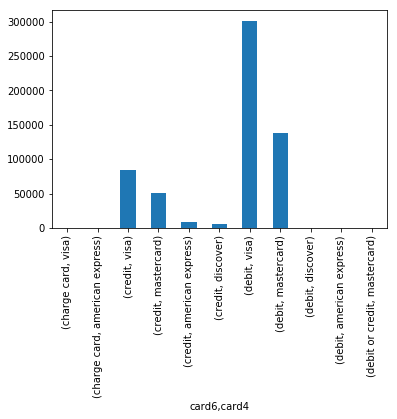

In [0]:
# TODO: code to generate the plot here.
f['card4'].groupby(f['card6']).value_counts().plot.bar()

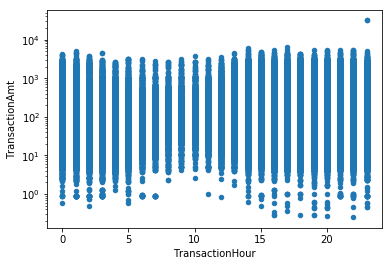

In [0]:
p=f.plot.scatter(x="TransactionHour", y="TransactionAmt")
p.set_yscale("log")


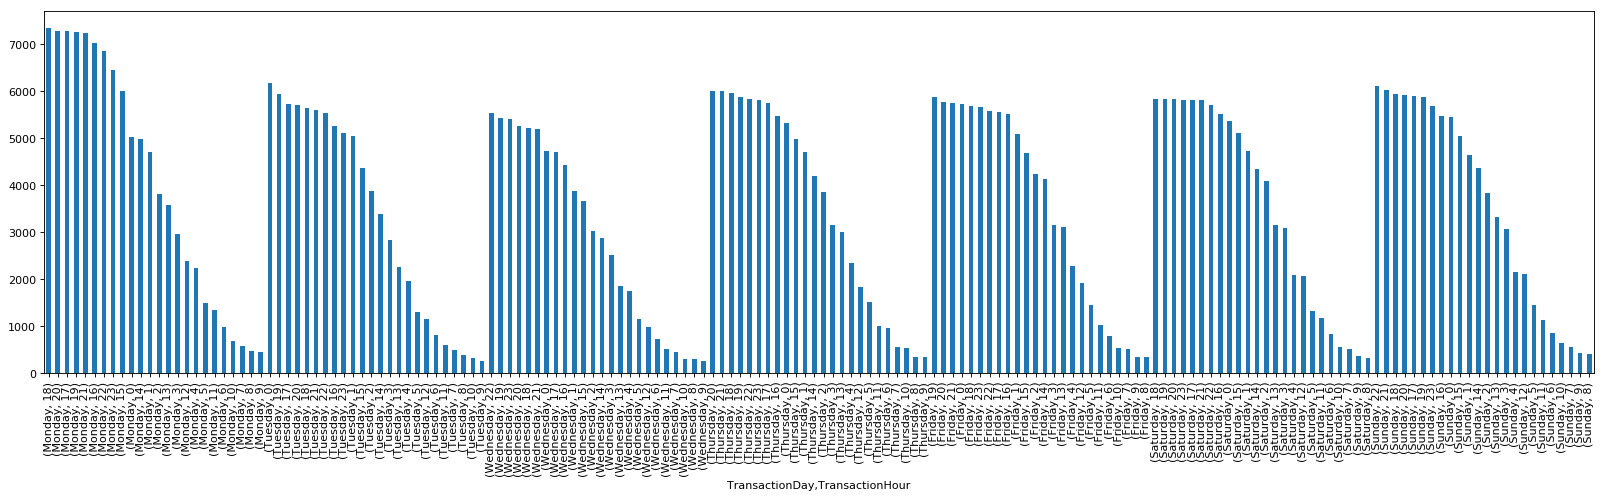

In [0]:
plt.figure(figsize=(25,6),dpi=80)
f['TransactionHour'].sort_index(ascending=True).groupby(f['TransactionDay'],sort=False).value_counts().plot(kind='bar')


1) First Plot I wanted to see what type of Card is most popular, turns out, Visa-Debit cards are most popular.

2) Scatter plot between TransactionAmt and Hour to find out the busiest hour for transactions. Best average of Amts can be found in middle, from 6-9am, based on our reference date.

3) I plot Number of Transactions by grouping hours and days of the weeks. We observe on Workdays, like Tuesday, Wednesday, Thursday most transactions happen at 19:00. Which probably means our reference time 00:00:00 is not good, as we expect most transactions to take place during 9am-5pm(office hours)

## Part 6 - Prediction Model

In [0]:
# TODO: code for your final model
train_trans=pd.read_csv('gdrive/My Drive/Colab Notebooks/DSF Homework2/train_transaction.csv', usecols=['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'C1', 'card4', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain'])
train_iden=pd.read_csv('gdrive/My Drive/Colab Notebooks/DSF Homework2/train_identity.csv', usecols=['TransactionID', 'DeviceType', 'DeviceInfo','id_02', 'id_19'])
#final table merged f
f=pd.merge(train_trans,train_iden,on='TransactionID',how='outer')
test_trans=pd.read_csv('gdrive/My Drive/Colab Notebooks/DSF Homework2/test_transaction.csv', usecols=['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'C1', 'card4', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain'])
test_iden=pd.read_csv('gdrive/My Drive/Colab Notebooks/DSF Homework2/test_identity.csv', usecols=['TransactionID', 'DeviceType', 'DeviceInfo', 'id_02', 'id_19'])
t=pd.merge(test_trans,test_iden,on='TransactionID',how='outer')

In [0]:
#Question 6
# After first pilot running, i realised categorical variables encoding may have mismatch
#Encoding together

f['train']=1
t['train']=0

com=pd.concat([f,t],sort=False)

cols=com.dtypes.pipe(lambda x:x[x=='object']).index

for i in cols:
  com[i]=pd.factorize(com[i])[0]
  
com.fillna(-1,inplace=True)#to maintain consistency, NaN replaced with -1

X_train=com[com['train']==1]
X_test=com[com['train']==0]
X_train.drop(["train"],axis=1,inplace=True)
X_test.drop(["train"],axis=1,inplace=True)

y=X_train['isFraud']
y=np.array(y)
X = X_train.iloc[:, 2:].values

Xt = X_test.iloc[:, 2:].values


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
#Question 6
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 200)


#Converting to floating points
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler  # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data


# # feature scaling

sc_X = StandardScaler()
X = sc_X.fit_transform(X)
Xt = sc_X.transform(Xt)

rf.fit(X,y)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_pred=rf.predict(Xt)

In [0]:
answer=pd.DataFrame(t,columns=['TransactionID'])
answer['isFraud']=y_pred
answer
answer.to_csv('answer.csv',index=False)

I first used Support Vector Classifier, SVC but it took a long train time. So I studied upon ML models which are faster. In a blog it mentioned for train data less than 100k, Random forest can be used.

At first, I naively used Random Forest and got a score efficiency of 0.54 on Kaggle, which is just better than a random coin-toss

While working on more, I realised to get better, I need to first understand the Data. Data was in different forms, so I decided to first get it in single form by encoding the strings. This approach infact reduced y efficiency in score by 0.002. There was clearly a problem.

I tried to explore my data more, when i realised, I didnt explore the test data. Thats when i found the problem, it was that my encoding was not matching.

I used the technique of concatenating the test and train data and then apply encoding, for uniform encoding. I run the code and received an efficiency of 0.77. And this was achieved just with the features that the question had mentioned.

I also tweaked the parameters of the Random Forest Regressor like the n_estimator.
Finally, I added more features to my model, based on how the data was dsitributed, i selected some features

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/saralstonybrook

Highest Rank: 5,200

Score: 0.8434

Number of entries: 5

INCLUDE IMAGE OF YOUR KAGGLE RANKING!

https://drive.google.com/file/d/1k-zQHgS9FLDsAfuhtP7w984cgva1xeX8/view?usp=sharing

